# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [1]:
# !pip install tensorflow


Empezamos importando librerías

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [4]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


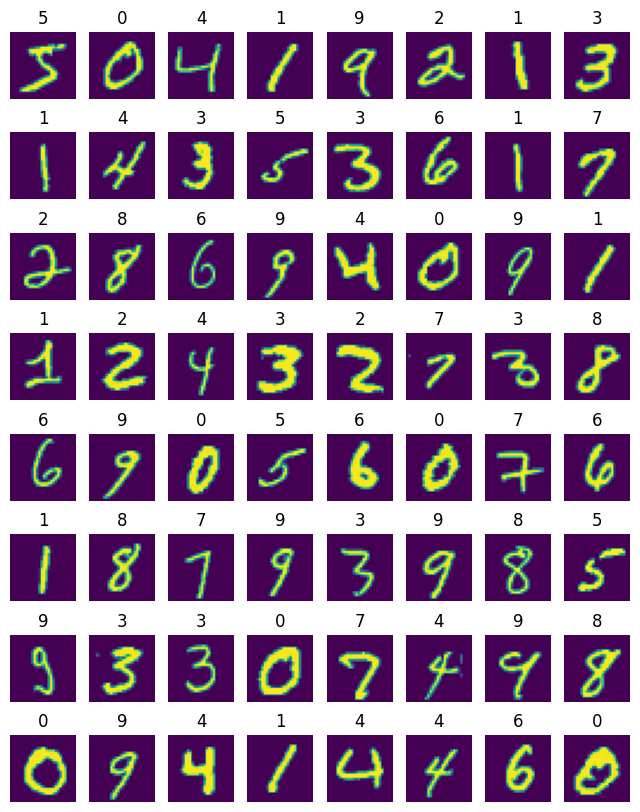

In [6]:
fig, axes = plt.subplots(8,8, figsize=(8,10))
for idx, ax in enumerate(axes.flat):
    ax.imshow(X_train[idx], aspect='auto')
    ax.axis('off')
    ax.set_title(f"{y_train[idx]}")

plt.subplots_adjust(hspace=0.5)
plt.show()

Vemos dimensiones del dataset

In [7]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

In [8]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [5]:
# X_train = X_train.reshape(-1, 28, 28, 1)
# X_test = X_test.reshape(-1, 28, 28, 1)

In [9]:
np.mean(X_train)

0.13066062

In [10]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
# y_train = y_train.astype("float32")
# y_test = y_test.astype("float32")

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [11]:
print(X_train.shape)

print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [12]:
model = keras.models.Sequential() # Instanciamos el modelo

In [13]:
model.add(keras.layers.Flatten(input_shape=(28,28))) # Primera Pseudo-capa -> de matriz a array

In [14]:
model.add(keras.layers.Dense(200, activation="relu")) # primera capa (hidden)

In [15]:
model.add(keras.layers.Dense(100, activation="relu")) # segunda capa (hidden)

In [12]:
# model.add(keras.layers.Dense(300))
# model.add(keras.layers.Activation("relu"))

784

In [155]:
# from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Flatten

In [156]:
# model = keras.models.Sequential()


In [157]:
# model.add(Conv2D(64, activation='relu', kernel_size=3, input_shape=(28,28,1)))

In [158]:
# model.add(Conv2D(32,activation='relu',  kernel_size=3))

In [159]:
# model.add(Flatten())

In [16]:
model.add(keras.layers.Dense(units = 10,
                            activation='softmax')) # Capa de salida (classification, 10 class)

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
# Equivalente
model.compile(
    optimizer = "adam", # Adam
    loss = "sparse_categorical_crossentropy", # sparse_cat vs cat
    metrics = ["accuracy"] # la que mejor nos venga
)

In [19]:
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178110 (695.74 KB)
Trainable params: 178110 (695.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [20]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 10,
    validation_split = 0.1
)

Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3039 - accuracy: 0.9136 - val_loss: 0.1275 - val_accuracy: 0.9647
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 0.1208 - accuracy: 0.9643 - val_loss: 0.0933 - val_accuracy: 0.9718
Epoch 3/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0808 - accuracy: 0.9756 - val_loss: 0.0815 - val_accuracy: 0.9752
Epoch 4/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0591 - accuracy: 0.9819 - val_loss: 0.0770 - val_accuracy: 0.9765
Epoch 5/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0450 - accuracy: 0.9857 - val_loss: 0.0760 - val_accuracy: 0.9765
Epoch 6/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0345 - accuracy: 0.9888 - val_loss: 0.0750 - val_accuracy: 0.9785
Epoch 7/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0269 - accuracy: 0.9916 - val_loss: 0.0752 - val_accuracy: 0.9787
Epoch 

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9776


[0.07993403822183609, 0.9775999784469604]

In [22]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 1, 'epochs': 10, 'steps': 422}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


{'loss': [0.30394887924194336,
  0.12080280482769012,
  0.08078160136938095,
  0.05911155045032501,
  0.04502482712268829,
  0.03448743373155594,
  0.026886971667408943,
  0.01971636712551117,
  0.01535592321306467,
  0.013687781058251858],
 'accuracy': [0.913611114025116,
  0.964296281337738,
  0.9756481647491455,
  0.981925904750824,
  0.9856851696968079,
  0.9887962937355042,
  0.9915925860404968,
  0.9941111207008362,
  0.9954074025154114,
  0.9957407116889954],
 'val_loss': [0.1274508237838745,
  0.09330463409423828,
  0.08149176836013794,
  0.07696803659200668,
  0.07604898512363434,
  0.07503049075603485,
  0.07516209781169891,
  0.08243560791015625,
  0.07717350125312805,
  0.08902468532323837],
 'val_accuracy': [0.9646666646003723,
  0.971833348274231,
  0.9751666784286499,
  0.9764999747276306,
  0.9764999747276306,
  0.9785000085830688,
  0.9786666631698608,
  0.9779999852180481,
  0.9794999957084656,
  0.9788333177566528]}

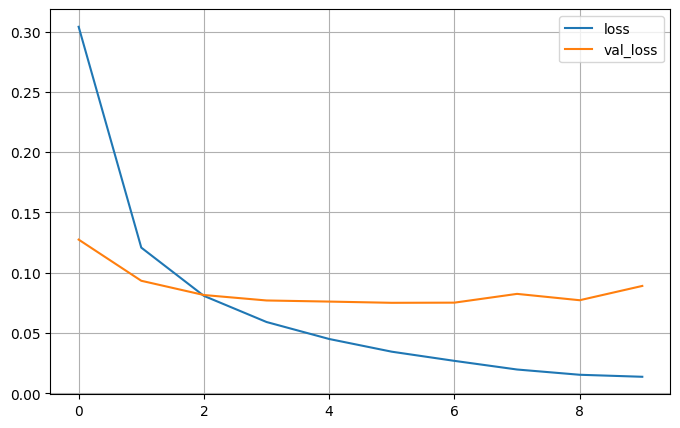

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[["loss", "val_loss"]].plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

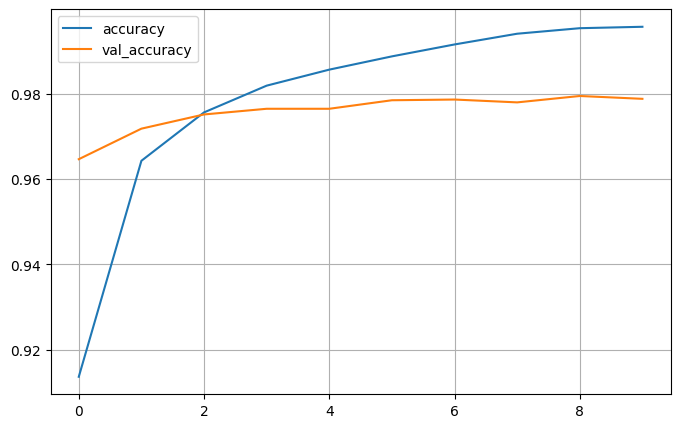

In [24]:
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = np.argmax(model.predict(X_test), axis=1)
confusion_matrix(y_test, predictions)

313/313 [==============================] - 1s 2ms/step


array([[ 969,    1,    1,    1,    1,    0,    1,    0,    2,    4],
       [   0, 1124,    4,    1,    0,    1,    2,    1,    2,    0],
       [   2,    1, 1008,    0,    1,    0,    2,    9,    8,    1],
       [   0,    0,    8,  982,    0,    1,    0,    4,    9,    6],
       [   1,    0,    7,    0,  954,    0,    3,    1,    1,   15],
       [   3,    1,    0,    7,    2,  853,    9,    2,   10,    5],
       [   6,    3,    2,    0,    3,    1,  942,    0,    1,    0],
       [   0,    7,    9,    0,    0,    0,    0, 1003,    1,    8],
       [   0,    1,    4,    4,    5,    0,    4,    2,  949,    5],
       [   1,    2,    0,    4,    5,    3,    0,    2,    0,  992]],
      dtype=int64)

In [27]:
print(classification_report(y_true=y_test, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# CONVOLUTIONS

Las imagenes en Keras (Tensorflow) tienen una tercera dimension con el numero de canales:
- 3 para imagenes color
- 1 escala de grises (0-1 para blanco y negro)

In [28]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [23]:
# X_train.shape, X_val.shape, X_test.shape

In [97]:
# from tensorflow.keras.utils import to_categorical
# #one-hot encode target column
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# y_val = to_categorical(y_val)

Bloque convolucional:

1. Convolucion (stride 1 y padding "same") con su activacion
2. Maxpooling
3. DropOut

>Tras el Bloque convolucional -> Flatten + Dense(s) + Output 

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
# Siempre al ppio ponemos el input shape que recordemos lleva la dimension de los canales
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))) 
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [30]:
model.compile(optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

In [31]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                184330    
                                                                 
Total params: 203434 (794.66 KB)
Trainable params: 203434 (794.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
history_cnn = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 10,
    validation_split = 0.1 # validation_split = 0.1
)

Epoch 1/10
422/422 [==============================] - 85s 200ms/step - loss: 0.1997 - accuracy: 0.9398 - val_loss: 0.0678 - val_accuracy: 0.9828
Epoch 2/10
422/422 [==============================] - 84s 200ms/step - loss: 0.0576 - accuracy: 0.9831 - val_loss: 0.0572 - val_accuracy: 0.9847
Epoch 3/10
422/422 [==============================] - 86s 204ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0513 - val_accuracy: 0.9873
Epoch 4/10
422/422 [==============================] - 85s 200ms/step - loss: 0.0285 - accuracy: 0.9912 - val_loss: 0.0498 - val_accuracy: 0.9880
Epoch 5/10
422/422 [==============================] - 83s 197ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0494 - val_accuracy: 0.9877
Epoch 6/10
422/422 [==============================] - 79s 187ms/step - loss: 0.0169 - accuracy: 0.9945 - val_loss: 0.0588 - val_accuracy: 0.9867
Epoch 7/10
422/422 [==============================] - 78s 186ms/step - loss: 0.0120 - accuracy: 0.9961 - val_loss: 0.0574 - val_ac

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0576 - accuracy: 0.9859


[0.05755884572863579, 0.9858999848365784]

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [29]:
# history = model.fit(
#     X_train,
#     y_train,
#     batch_size = 64,
#     epochs = 10,
#     validation_split = 0.1
# )

Epoch 1/10
844/844 [==============================] - 12s 14ms/step - loss: 0.1795 - accuracy: 0.9492 - val_loss: 0.1460 - val_accuracy: 0.9603
Epoch 2/10
844/844 [==============================] - 13s 15ms/step - loss: 0.1683 - accuracy: 0.9521 - val_loss: 0.1371 - val_accuracy: 0.9640
Epoch 3/10
844/844 [==============================] - 15s 18ms/step - loss: 0.1586 - accuracy: 0.9555 - val_loss: 0.1302 - val_accuracy: 0.9658
Epoch 4/10
844/844 [==============================] - 10s 11ms/step - loss: 0.1491 - accuracy: 0.9585 - val_loss: 0.1247 - val_accuracy: 0.9660
Epoch 5/10
844/844 [==============================] - 8s 10ms/step - loss: 0.1413 - accuracy: 0.9603 - val_loss: 0.1219 - val_accuracy: 0.9672
Epoch 6/10
844/844 [==============================] - 11s 13ms/step - loss: 0.1336 - accuracy: 0.9630 - val_loss: 0.1170 - val_accuracy: 0.9678
Epoch 7/10
844/844 [==============================] - 13s 16ms/step - loss: 0.1271 - accuracy: 0.9638 - val_loss: 0.1109 - val_accuracy: 

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

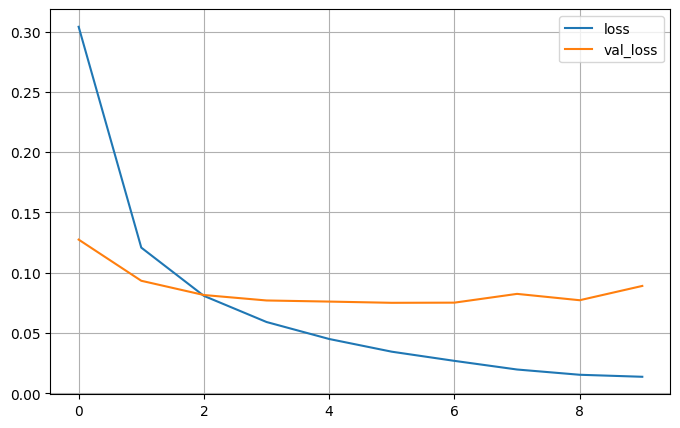

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[["loss", "val_loss"]].plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [35]:
results = model.evaluate(X_test, y_test)
results

313/313 [==============================] - 4s 13ms/step - loss: 0.0576 - accuracy: 0.9859


[0.05755884572863579, 0.9858999848365784]

In [36]:
predictions = [x.argmax() for x in predictions]

In [58]:
predictions

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 4,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [37]:
predictions = model.predict(X_test)
predictions = [x.argmax() for x in predictions]
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, predictions))

313/313 [==============================] - 4s 11ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       980
         1.0       0.98      0.99      0.99      1135
         2.0       0.97      0.97      0.97      1032
         3.0       0.97      0.98      0.97      1010
         4.0       0.97      0.98      0.97       982
         5.0       0.97      0.97      0.97       892
         6.0       0.97      0.97      0.97       958
         7.0       0.97      0.97      0.97      1028
         8.0       0.97      0.97      0.97       974
         9.0       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [38]:
confusion_matrix(y_test, predictions)

array([[ 972,    1,    2,    1,    0,    0,    2,    0,    2,    0],
       [   0, 1128,    1,    0,    1,    0,    2,    1,    2,    0],
       [   2,    4, 1010,    0,    2,    0,    2,    7,    5,    0],
       [   0,    0,    1, 1003,    0,    2,    0,    1,    3,    0],
       [   0,    2,    1,    0,  969,    0,    5,    0,    0,    5],
       [   1,    0,    2,    7,    0,  874,    6,    0,    1,    1],
       [   8,    2,    0,    0,    1,    2,  942,    0,    3,    0],
       [   0,    2,    6,    1,    0,    0,    0, 1013,    2,    4],
       [   1,    0,    1,    0,    0,    0,    1,    2,  968,    1],
       [   2,    3,    0,    0,    7,    5,    0,    4,    8,  980]],
      dtype=int64)

In [53]:
y_test

array([7., 2., 1., ..., 4., 5., 6.], dtype=float32)

In [52]:
predictions

array([[4.0855630e-06, 3.4793152e-07, 7.3842582e-04, ..., 9.9762005e-01,
        1.5418636e-05, 1.0657544e-04],
       [5.4300317e-06, 1.6808834e-04, 9.9920976e-01, ..., 3.0057826e-10,
        2.3442721e-05, 1.1949176e-10],
       [1.8620340e-05, 9.9548727e-01, 7.1914750e-04, ..., 2.3690804e-03,
        6.3957914e-04, 1.1799418e-05],
       ...,
       [2.2643643e-08, 1.2623071e-09, 1.3851817e-08, ..., 8.9977602e-06,
        2.0427322e-05, 1.5987227e-04],
       [1.2822517e-06, 5.3381439e-07, 4.2556245e-08, ..., 2.7401737e-07,
        5.2116206e-04, 1.7871107e-08],
       [9.6839303e-06, 2.3343633e-10, 1.2147169e-05, ..., 5.6243024e-11,
        1.1988236e-07, 1.4896716e-08]], dtype=float32)

C:\Users\admin\AppData\Local\Temp\ipykernel_8208\1468152043.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


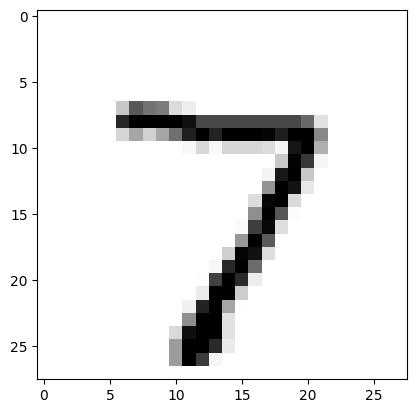

In [39]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [53]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [63]:
predictions = model.predict(X_test[:1]).round(3)
print(predictions.shape)
predictions

(1, 10)


array([[0.   , 0.   , 0.001, 0.002, 0.   , 0.   , 0.   , 0.998, 0.   ,
        0.   ]], dtype=float32)

In [58]:
predictions.argmax()

7

In [41]:
model.predict(X_test).argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [65]:
y_test[2]

1.0

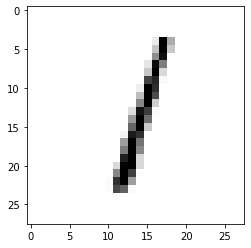

In [64]:
plt.imshow(X_test[2].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [46]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [44]:
!pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [33]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.to_csv()

Divimos en train, test y validation

In [37]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [68]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [51]:
X_train.shape[1:]

(8,)

In [69]:
keras.layers.Dense??

Init signature:
keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Source:        
@keras_export('keras.layers.Dense')
class Dense(Layer):
  """Just your regular densely-connected NN layer.

  `Dense` implements the operation:
  `output = activation(dot(input, kernel) + bias)`
  where `activation` is the element-wise activation function
  passed as the `activation` argument, `kernel` is a weights matrix
  created by the layer, and `bias` is a bias vector created by the layer
  (only applicable if `use_bias` is `True`). These are all attributes of
  `Dense`.

  Note: If the input to the layer has a rank greater than 2, then `Dense`
  computes the dot product between the `inputs` and the `kernel` along the
  last axis of the `inputs` and axis 0

In [46]:
model = keras.models.Sequential(
    [
    keras.layers.Dense(30, activation = 'relu',
    
                      input_shape = X_train.shape[1:]),
                      keras.layers.Dropout(0.2),
                      keras.layers.Dense(30, activation = 'relu'),
                      keras.layers.Dropout(0.2),
                      keras.layers.Dense(1)
    
])

# model.add(keras.layers.Dense(30, activation = 'relu',
#                       input_shape = X_train.shape[1:]))

# model.add(keras.layers.Dense(30, activation = 'relu'))

# model.add(keras.layers.Dense(1))

model.compile(loss = "mean_squared_error",
             optimizer = "sgd")


In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_8 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [48]:

history = model.fit(X_train,
                   y_train,
                   epochs = 40,
                   validation_data = (X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 3s 3ms/step - loss: 0.6641 - val_loss: 0.5913
Epoch 2/40
363/363 [==============================] - 1s 3ms/step - loss: 0.4463 - val_loss: 0.4466
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4266 - val_loss: 1.0476
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4181 - val_loss: 0.3931
Epoch 5/40
363/363 [==============================] - 1s 3ms/step - loss: 0.3916 - val_loss: 0.3917
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3813 - val_loss: 0.3812
Epoch 7/40
363/363 [==============================] - 2s 5ms/step - loss: 0.3734 - val_loss: 0.3760
Epoch 8/40
363/363 [==============================] - 1s 3ms/step - loss: 0.3705 - val_loss: 0.3846
Epoch 9/40
363/363 [==============================] - 1s 3ms/step - loss: 0.3651 - val_loss: 0.3657
Epoch 10/40
363/363 [==============================] - 3s 7ms/step - loss: 0.3705 - val_loss: 0.3608

In [49]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 [==============================] - 1s 5ms/step - loss: 0.3138A: 0s - loss
0.3137764632701874


In [43]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [50]:
r2_score(y_test, model.predict(X_test))

0.7647124022526467

In [51]:
mean_absolute_percentage_error(y_test, model.predict(X_test))

0.22840938388412046

In [56]:
y_pred = model.predict(X_test[:5])
y_pred

array([[2.7218366 ],
       [2.564496  ],
       [3.007024  ],
       [1.4103477 ],
       [0.81153166]], dtype=float32)

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [52]:
model.save("my_keras_model.h5")

In [76]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.h5")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [53]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")
history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb])

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3037
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3016
Epoch 3/30
363/363 [==============================] - 2s 7ms/step - loss: 0.3008
Epoch 4/30
363/363 [==============================] - 2s 6ms/step - loss: 0.3801
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3096
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3082
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3046
Epoch 8/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3004
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3029
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2999
Epoch 11/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2976
Epoch 12/30
363/363 [==============================] - 1s 4ms/step - loss: 0.2963
Epoch 13/30
363/363 [====

In [54]:
r2_score(y_test, model.predict(X_test)),mean_absolute_percentage_error(y_test, model.predict(X_test))

(0.7793336069182814, 0.2118270810837798)

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [94]:
keras.callbacks.EarlyStopping??

Init signature:
keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)
Source:        
@keras_export('keras.callbacks.EarlyStopping')
class EarlyStopping(Callback):
  """Stop training when a monitored metric has stopped improving.

  Assuming the goal of a training is to minimize the loss. With this, the
  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
  `model.fit()` training loop will check at end of every epoch whether
  the loss is no longer decreasing, considering the `min_delta` and
  `patience` if applicable. Once it's found no longer decreasing,
  `model.stop_training` is marked True and the training terminates.

  The quantity to be monitored needs to be available in `logs` dict.
  To make it so, pass the loss or metrics at `model.compile()`.

  Args:
    monitor: Quantity to be monitored.
    min_delta: Minimum change in the monitored q

In [55]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5", 
                                                save_best_only=True)
history = model.fit(X_train,
                   y_train,
                   epochs=40,
                    validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb, checkpoint_cb])

Epoch 1/40
363/363 [==============================] - 2s 5ms/step - loss: 0.2843 - val_loss: 0.3092
Epoch 2/40
363/363 [==============================] - 1s 3ms/step - loss: 0.2840 - val_loss: 0.3133
Epoch 3/40
363/363 [==============================] - 1s 3ms/step - loss: 0.2857 - val_loss: 0.3148
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.2820 - val_loss: 0.3125
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.2828 - val_loss: 0.3210
Epoch 6/40
363/363 [==============================] - 1s 3ms/step - loss: 0.2810 - val_loss: 0.3112
